In [2]:
import warnings
import pandas as pd
warnings.filterwarnings('ignore')
%config Completer.use_jedi = False

In [3]:
df_train = pd.read_csv('emotions-dataset-for-nlp/train.txt', header = None, sep = ';', names = ['Input', 'Sentiment'], encoding = 'utf-8')
df_test = pd.read_csv('emotions-dataset-for-nlp/test.txt', header = None, sep = ';', names = ['Input', 'Sentiment'], encoding = 'utf-8')
df_val = pd.read_csv('emotions-dataset-for-nlp/val.txt', header = None, sep = ';', names = ['Input', 'Sentiment'], encoding = 'utf-8')

In [4]:
df_full = pd.concat([df_train, df_test, df_val], axis = 0)
df_full

,Input,Sentiment
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
1995,im having ssa examination tomorrow in the morn...,sadness
1996,i constantly worry about their fight against n...,joy
1997,i feel its important to share this info for th...,joy
1998,i truly feel that if you are passionate enough...,joy


In [5]:
import text_hammer as th

In [6]:
import text_preprocessing as tp

from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()

def text_preprocessing(df, column):
    df[column] = df[column].replace(r'@\S+', '', regex=True)
    df[column] = df[column].replace(r'#\S+', '', regex=True)
    df[column] = df[column].replace(r'$\S+', '', regex=True)
    df[column] = df[column].replace(r'[^\w\s]', '', regex=True)
    df[column] = df[column].replace(r'\d+', '', regex=True)
    df[column] = df[column].progress_apply(lambda x: tp.expand_contraction(x))
    df[column] = df[column].progress_apply(lambda x: tp.remove_email(x))
    df[column] = df[column].progress_apply(lambda x: tp.remove_url(x))
    df[column] = df[column].progress_apply(lambda x: tp.remove_special_character(x))
    df[column] = df[column].progress_apply(lambda x: tp.normalize_unicode(x))
    df[column] = df[column].progress_apply(lambda x: tp.remove_stopword(x))
    df[column] = df[column].progress_apply(lambda x: tp.stem_word(x))
    # df[column] = df[column].progress_apply(lambda x: tp.tokenize_word(x))
    
    # df[column] = df[column].progress_apply(lambda x: str(x).lower())
    # df[column] = df[column].progress_apply(lambda x: th.cont_exp(x))
    # df[column] = df[column].progress_apply(lambda x: th.remove_emails(x))
    # df[column] = df[column].progress_apply(lambda x: th.remove_html_tags(x))
    # df[column] = df[column].progress_apply(lambda x: th.remove_special_chars(x))
    # df[column] = df[column].progress_apply(lambda x: th.remove_accented_chars(x))
    return df


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/ekanshgupta/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [7]:
import text_preprocessing as tp

In [8]:
df_cleaned = text_preprocessing(df_full, 'Input')

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/20000 [00:00<?, ?it/s]

In [9]:
df_cleaned.head()

,Input,Sentiment
0,"[feel, humili]",sadness
1,"[go, feel, hopeless, damn, hope, around, someo...",sadness
2,"[grab, minut, post, feel, greedi, wrong]",anger
3,"[ever, feel, nostalg, fireplac, know, still, p...",love
4,"[feel, grouchi]",anger


In [10]:
df_cleaned = df_cleaned.copy()

In [11]:
df_cleaned['num_words'] = df_cleaned.Input.apply(lambda x: len(x))

In [12]:
df_cleaned['Sentiment'] = df_cleaned.Sentiment.astype('category')
df_cleaned.Sentiment.cat.codes

0       4
1       4
2       0
3       3
4       0
       ..
1995    4
1996    2
1997    2
1998    2
1999    2
Length: 20000, dtype: int8

In [13]:
df_cleaned.Sentiment.unique()

['sadness', 'anger', 'love', 'surprise', 'fear', 'joy']
Categories (6, object): ['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']

In [14]:
df_cleaned.Sentiment

0       sadness
1       sadness
2         anger
3          love
4         anger
         ...   
1995    sadness
1996        joy
1997        joy
1998        joy
1999        joy
Name: Sentiment, Length: 20000, dtype: category
Categories (6, object): ['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']

In [15]:
encoded_dict  = {'anger': 0, 'fear': 1, 'joy': 2, 'love': 3, 'sadness': 4, 'surprise': 5}

In [16]:
df_cleaned['Sentiment'] = df_cleaned.Sentiment.cat.codes
df_cleaned.Sentiment

0       4
1       4
2       0
3       3
4       0
       ..
1995    4
1996    2
1997    2
1998    2
1999    2
Name: Sentiment, Length: 20000, dtype: int8

In [17]:
df_cleaned.head()

,Input,Sentiment,num_words
0,"[feel, humili]",4,2
1,"[go, feel, hopeless, damn, hope, around, someo...",4,9
2,"[grab, minut, post, feel, greedi, wrong]",0,6
3,"[ever, feel, nostalg, fireplac, know, still, p...",3,7
4,"[feel, grouchi]",0,2


In [18]:
df_cleaned.num_words.max()

35

In [19]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(df_cleaned, test_size=0.3, random_state=42, stratify=df_cleaned.Sentiment)

In [20]:
data_train.head().Input

7181                               [feel, sure, go, busi]
9479                 [feel, uptight, wonder, know, right]
812     [allow, eat, food, know, bother, sinc, feel, a...
8670    [happi, progress, also, begin, feel, littl, ho...
1014    [alon, apart, get, overwhelm, feel, like, watc...
Name: Input, dtype: object

In [21]:
data_train.shape

(14000, 3)

In [22]:
data_test.shape

(6000, 3)

In [23]:
data_train.head()

,Input,Sentiment,num_words
7181,"[feel, sure, go, busi]",2,4
9479,"[feel, uptight, wonder, know, right]",1,5
812,"[allow, eat, food, know, bother, sinc, feel, a...",4,16
8670,"[happi, progress, also, begin, feel, littl, ho...",4,7
1014,"[alon, apart, get, overwhelm, feel, like, watc...",4,8


In [24]:
from tensorflow.keras.utils import to_categorical

In [25]:
to_categorical(data_train.Sentiment)

array([[0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [26]:
from transformers import AutoTokenizer, TFBertModel
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')
bert = TFBertModel.from_pretrained('bert-base-cased')

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [27]:
tokenizer.save_pretrained('bert-tokenizer')
bert.save_pretrained('bert-model')

In [28]:
import shutil
shutil.make_archive('bert-tokenizer', 'zip', 'bert-tokenizer')
shutil.make_archive('bert-model', 'zip', 'bert-model')

'/Users/ekanshgupta/StockSentiment/bert-model.zip'

In [29]:
from transformers import BertTokenizer, TFBertModel, BertConfig, TFDistilBertModel, DistilBertTokenizer, DistilBertConfig
dbert_model = TFDistilBertModel.from_pretrained('distilbert-base-uncased')

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['activation_13', 'vocab_transform', 'vocab_projector', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [30]:
x_train = tokenizer(
    text=data_train.Input.tolist(),
    is_split_into_words=True,
    add_special_tokens=True,
    max_length=36,
    truncation=True,
    padding=True,
    return_tensors='tf',
    return_token_type_ids=False,
    return_attention_mask=True,
    verbose=True
)
x_test = tokenizer(
    text=data_test.Input.tolist(),
    is_split_into_words=True,
    add_special_tokens=True,
    max_length=36,
    truncation=True,
    padding=True,
    return_tensors='tf',
    return_token_type_ids=False,
    return_attention_mask=True,
    verbose=True
)

In [31]:
x_train
x_test

{'input_ids': <tf.Tensor: shape=(6000, 36), dtype=int32, numpy=
array([[ 101, 1474, 1271, ...,    0,    0,    0],
       [ 101, 1631, 1176, ..., 1403,  102,    0],
       [ 101, 2647, 1631, ...,    0,    0,    0],
       ...,
       [ 101, 1631, 2393, ...,    0,    0,    0],
       [ 101, 1180, 1631, ...,    0,    0,    0],
       [ 101, 5178, 5427, ...,    0,    0,    0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(6000, 36), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>}

In [32]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical

In [33]:
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU')


[]

In [34]:
max_len = 36
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
   
input_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
input_mask = Input(shape=(max_len,), dtype=tf.int32, name="attention_mask")
# embeddings = dbert_model(input_ids,attention_mask = input_mask)[0]


embeddings = bert(input_ids,attention_mask = input_mask)[0] #(0 is the last hidden states,1 means pooler_output)
out = tf.keras.layers.GlobalMaxPool1D()(embeddings)
out = Dense(128, activation='relu')(out)
out = tf.keras.layers.Dropout(0.1)(out)
out = Dense(32,activation='relu')(out)

y = Dense(6,activation='sigmoid')(out)

model = tf.keras.Model(inputs=[input_ids, input_mask], outputs=y)
model.layers[2].trainable = True

In [35]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 36)]         0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 36)]         0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  108310272   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 36,                                            

In [36]:
tf.keras.utils.plot_model(model, show_shapes=True)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [37]:
optimizer = Adam(
    learning_rate=5e-05,
    epsilon=1e-08,
    decay=0.01,
    clipnorm=1.0
)

# set loss and metrics
loss = CategoricalCrossentropy(from_logits=True)
metric = CategoricalAccuracy('balanced_accuracy')
# compile the model
model.compile(optimizer=optimizer, loss=loss, metrics=metric)

In [38]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 36)]         0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 36)]         0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  108310272   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 36,                                            

In [39]:
tf.config.experimental_run_functions_eagerly(True)
tf.config.run_functions_eagerly(True)

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [40]:
train_history = model.fit(
    x = {'input_ids':x_train['input_ids'], 'attention_mask':x_train['attention_mask']},
    y = to_categorical(data_train.Sentiment),
    validation_data = (
        {'input_ids': x_test['input_ids'], 'attention_mask':x_test['attention_mask']}, to_categorical(data_train.Sentiment)
    ),
    epochs = 1,
    batch_size = 36
)

2023-04-25 19:30:16.107843: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


389/389 [==============================] - ETA: 0s - loss: 0.9245 - balanced_accuracy: 0.6602

ValueError: Data cardinality is ambiguous:
  x sizes: 6000, 6000
  y sizes: 14000
Make sure all arrays contain the same number of samples.

In [41]:
predicted_raw = model.predict({'input_ids' : x_test['input_ids'], 'attention_mask': x_test['attention_mask']})

188/188 [==============================] - 254s 1s/step


In [42]:
predicted_raw[0]

array([0.99552   , 0.86620647, 0.31868762, 0.36744428, 0.65778565,
       0.572978  ], dtype=float32)

In [43]:
from pandas import np
y_predicted = np.argmax(predicted_raw, axis=1)

In [44]:
from sklearn.metrics import classification_report
classification_report(data_test.Sentiment, y_predicted)

'              precision    recall  f1-score   support\n\n           0       0.89      0.85      0.87       813\n           1       0.85      0.82      0.84       712\n           2       0.87      0.93      0.90      2028\n           3       0.86      0.59      0.70       492\n           4       0.90      0.95      0.92      1739\n           5       0.75      0.72      0.74       216\n\n    accuracy                           0.88      6000\n   macro avg       0.85      0.81      0.83      6000\nweighted avg       0.88      0.88      0.87      6000\n'

In [45]:
#import from Tweet.ipynb
%store -r tweets_simplify
%store -r body
%store -r ticker
%store -r stock_price
%store -r tweets_apple
%store -r tweets_amzn
%store -r tweets_google
%store -r tweets_msft
%store -r tweets_tsla

In [46]:
(tweets_apple.index)

RangeIndex(start=0, stop=25, step=1)

In [47]:
#apple tweets sentiment
apple = []
for i in range (len(tweets_apple.index)):
    x_val = tokenizer(
        text = tweets_apple['body'][i],
        add_special_tokens=True,
        max_length = 36,
        truncation = True,
        padding='max_length',
        return_tensors='tf',
        return_token_type_ids=False,
        return_attention_mask=True,
        verbose=True
    )
    apple.append(model.predict({'input_ids':x_val['input_ids'],'attention_mask':x_val['attention_mask']})*100)
apple

6/6 [==============================] - 6s 976ms/step


[array([[36.967552, 20.434433, 69.88845 , 30.082342, 55.441986, 53.021313],
        [48.04966 , 19.007517, 85.16947 , 34.859882, 64.164925, 40.02877 ],
        [39.12419 , 23.462929, 91.996   , 52.44791 , 61.88773 , 34.767166],
        ...,
        [54.105385, 67.842445, 86.140045, 59.835808, 54.352127, 39.160496],
        [31.00454 , 18.034834, 91.79528 , 73.71033 , 58.18828 , 19.604628],
        [44.211525, 40.543724, 83.60635 , 56.59116 , 70.383224, 32.701576]],
       dtype=float32),
 array([[49.624737, 38.994377, 78.123024, 35.77943 , 72.484695, 44.10915 ],
        [47.46522 , 36.105408, 72.993355, 39.13352 , 56.096977, 48.274033],
        [51.28544 , 32.975163, 88.59069 , 48.1447  , 68.32816 , 30.700409],
        ...,
        [39.76567 , 25.065365, 82.50462 , 34.802097, 53.496426, 44.026676],
        [32.587017, 16.95084 , 92.04419 , 49.50091 , 57.18631 , 37.35787 ],
        [53.71721 , 34.96743 , 91.30816 , 52.509666, 64.816574, 29.74303 ]],
       dtype=float32),
 array([[47.89

In [48]:
#amzn tweets sentiment
amzn = []
for i in range (len(tweets_amzn.index)):
    x_val = tokenizer(
        text = tweets_amzn['body'][i],
        add_special_tokens=True,
        max_length = 36,
        truncation = True,
        padding='max_length',
        return_tensors='tf',
        return_token_type_ids=False,
        return_attention_mask=True,
        verbose=True
    )
    amzn.append(model.predict({'input_ids':x_val['input_ids'],'attention_mask':x_val['attention_mask']})*100)
amzn

2/2 [==============================] - 2s 1s/step


[array([[52.052586 , 25.557562 , 68.40768  , 38.12233  , 69.06086  ,
         39.897568 ],
        [30.855602 , 23.918917 , 85.71331  , 63.52943  , 61.913055 ,
         26.121155 ],
        [39.506214 , 26.440329 , 82.047745 , 61.01403  , 63.771164 ,
         32.71249  ],
        [53.69995  , 45.2614   , 88.80453  , 50.15171  , 63.76845  ,
         39.38193  ],
        [38.042885 , 31.111721 , 81.92465  , 54.32307  , 63.731647 ,
         31.076908 ],
        [69.06564  , 21.229763 , 82.70407  , 30.043066 , 89.81637  ,
         37.626236 ],
        [39.686954 , 30.27536  , 82.65373  , 55.577923 , 65.69035  ,
         29.650557 ],
        [55.67465  , 15.7466545, 92.06945  , 56.129623 , 64.53995  ,
         28.306845 ],
        [38.622536 , 40.210262 , 68.32078  , 51.34433  , 55.234207 ,
         37.611366 ],
        [70.133705 , 53.370636 , 75.83564  , 45.515965 , 75.10555  ,
         40.20342  ],
        [54.62218  , 14.876388 , 64.369095 , 29.421753 , 84.06709  ,
         35.715694 ],

In [49]:
#google tweets sentiment
google = []
for i in range (len(tweets_google.index)):
    x_val = tokenizer(
        text = tweets_google['body'][i],
        add_special_tokens=True,
        max_length = 36,
        truncation = True,
        padding='max_length',
        return_tensors='tf',
        return_token_type_ids=False,
        return_attention_mask=True,
        verbose=True
    )
    google.append(model.predict({'input_ids':x_val['input_ids'],'attention_mask':x_val['attention_mask']})*100)
google

1/1 [==============================] - 1s 1s/step


[array([[39.12419 , 23.462929, 91.996   , 52.44791 , 61.88773 , 34.767166],
        [41.80865 , 39.477333, 81.558815, 62.375195, 54.173607, 36.36311 ],
        [53.952766, 78.78231 , 56.089676, 41.26678 , 44.610767, 52.21513 ],
        [51.80914 , 35.657497, 76.829796, 59.089325, 68.52401 , 34.26527 ],
        [44.086437, 27.546104, 91.91594 , 67.54268 , 52.570236, 30.274979],
        [45.6633  , 34.776543, 86.17725 , 46.97514 , 61.19635 , 39.1923  ],
        [53.642963, 36.730564, 89.66213 , 59.14029 , 60.669876, 36.311462],
        [40.703213, 28.963026, 80.98907 , 61.449562, 63.979523, 28.0563  ],
        [43.07948 , 32.657368, 77.97194 , 48.454258, 58.112984, 42.52703 ],
        [48.294506, 43.60488 , 84.009186, 43.93731 , 64.73213 , 40.081112],
        [46.234516, 26.691204, 95.25637 , 85.6755  , 55.27414 , 21.236336],
        [41.519154, 33.07095 , 80.41116 , 70.59028 , 58.447723, 26.727095],
        [70.133705, 53.370636, 75.83564 , 45.515965, 75.10555 , 40.20342 ],
        [44.

In [50]:
#msft tweets sentiment
msft = []
for i in range (len(tweets_msft.index)):
    x_val = tokenizer(
        text = tweets_msft['body'][i],
        add_special_tokens=True,
        max_length = 36,
        truncation = True,
        padding='max_length',
        return_tensors='tf',
        return_token_type_ids=False,
        return_attention_mask=True,
        verbose=True
    )
    msft.append(model.predict({'input_ids':x_val['input_ids'],'attention_mask':x_val['attention_mask']})*100)
msft

1/1 [==============================] - 1s 1s/step


[array([[39.12419 , 23.462929, 91.996   , 52.44791 , 61.88773 , 34.767166],
        [37.102978, 33.391693, 70.18488 , 50.21676 , 61.222946, 43.79954 ],
        [65.398125, 43.53591 , 60.58191 , 31.21288 , 59.404415, 52.111614],
        [46.559666, 21.740265, 82.424805, 51.877903, 69.24046 , 31.292576],
        [39.576054, 31.939888, 70.04614 , 17.24889 , 47.07079 , 70.00677 ],
        [37.45574 , 21.864424, 89.165245, 67.275314, 59.660267, 23.656454],
        [45.47636 , 49.12677 , 89.80564 , 64.35668 , 56.580647, 35.6657  ],
        [46.39481 , 33.536346, 69.98197 , 32.651157, 61.028473, 50.12969 ],
        [42.39748 , 24.569017, 79.12015 , 45.99317 , 62.481075, 34.382336],
        [42.8532  , 32.755676, 84.17379 , 58.37279 , 64.43061 , 34.136044],
        [58.07708 , 39.5868  , 88.068405, 44.676994, 75.99888 , 38.688957],
        [55.589397, 30.699276, 78.04359 , 46.848434, 63.119072, 41.786716],
        [45.02857 , 41.349567, 93.25977 , 67.12261 , 62.2589  , 30.56293 ],
        [32.

In [51]:
#tesla tweets sentiment
tsla = []
for i in range (len(tweets_tsla.index)):
    x_val = tokenizer(
        text = tweets_tsla['body'][i],
        add_special_tokens=True,
        max_length = 36,
        truncation = True,
        padding='max_length',
        return_tensors='tf',
        return_token_type_ids=False,
        return_attention_mask=True,
        verbose=True
    )
    tsla.append(model.predict({'input_ids':x_val['input_ids'],'attention_mask':x_val['attention_mask']})*100)
tsla

3/3 [==============================] - 3s 886ms/step


[array([[48.04966 , 19.007517, 85.16947 , 34.859882, 64.164925, 40.02877 ],
        [52.052586, 25.557562, 68.40768 , 38.12233 , 69.06086 , 39.897568],
        [59.75021 , 30.807976, 77.02812 , 29.442188, 63.793087, 48.78814 ],
        [57.195484, 30.765926, 81.919304, 36.600235, 64.87348 , 43.886395],
        [58.5323  , 39.397408, 77.70346 , 60.65383 , 64.74046 , 33.040844],
        [51.498188, 47.73367 , 76.4786  , 40.643536, 59.279736, 43.114082],
        [48.409443, 46.144207, 71.0032  , 61.981922, 63.983948, 36.796577],
        [66.38707 , 61.968506, 70.04884 , 47.12653 , 61.2785  , 50.095253],
        [65.57874 , 42.946167, 64.96879 , 23.710089, 74.82214 , 52.663685],
        [40.31378 , 23.6924  , 70.820656, 40.65827 , 64.537415, 40.351467],
        [57.32922 , 29.784494, 87.42643 , 49.765877, 70.67845 , 32.12213 ],
        [34.512177, 31.754896, 96.16608 , 66.92781 , 61.26181 , 26.075346],
        [44.579876, 31.633972, 91.794624, 54.916756, 59.316082, 37.978096],
        [33.

In [52]:
%store -r price_amzn
%store -r price_apple
%store -r price_google
%store -r price_msft
%store -r price_tsla

In [53]:
#from 2015-1-11 to 2015-6-29
price_amzn_test = price_amzn.iloc[0:25]
price_google_test = price_google.iloc[0:25]
price_apple_test = price_apple.iloc[0:25]
price_msft_test = price_msft.iloc[0:25]
price_tsla_test = price_tsla.iloc[0:25]

#

In [54]:
#average sentiment for apple
# apple_sentiment_mean = []
# for i in apple:
#     apple_sentiment_mean.append((np.mean(i, axis=0)))
# apple_sentiment_mean

apple_sentiment_mean = []
result_ans = []

for i in apple:
    apple_sentiment_mean.append((np.mean(i, axis=0)))
for i in apple_sentiment_mean:
    result_dict = {}
    for key, value in zip(encoded_dict.keys(), i):
        result_dict[key]=value
    result_ans.append(result_dict)

df_apple = pd.DataFrame(result_ans)
merge_apple = pd.concat([price_apple_test[['day_date', 'net_price']], df_apple], axis=1)
merge_apple

,day_date,net_price,anger,fear,joy,love,sadness,surprise
0,2015-01-11,-6.610,46.608097,32.631252,82.038445,49.035389,64.084770,37.115028
1,2015-01-18,5.950,46.761532,33.955452,83.297043,50.590492,62.707428,37.300095
2,2015-01-25,3.420,46.453911,33.947308,82.642883,49.922199,62.748383,37.470486
3,2015-02-01,0.880,46.346653,32.960983,83.851753,49.528370,64.933052,36.399204
4,2015-02-08,8.530,49.602570,36.867733,82.374161,48.424725,64.572433,38.363625
5,2015-02-15,2.215,46.484634,35.020317,82.914307,50.601662,62.641346,37.372311
6,2015-02-22,-1.560,48.149548,34.918182,80.369774,48.997379,63.279938,38.724476
7,2015-03-01,-2.650,48.291580,35.968739,81.348137,48.841171,64.152298,38.331352
8,2015-03-08,-4.370,48.581615,34.593712,80.941422,49.318737,64.151733,37.611282
9,2015-03-15,2.020,47.316116,35.242493,81.753326,51.605408,62.756832,36.698036


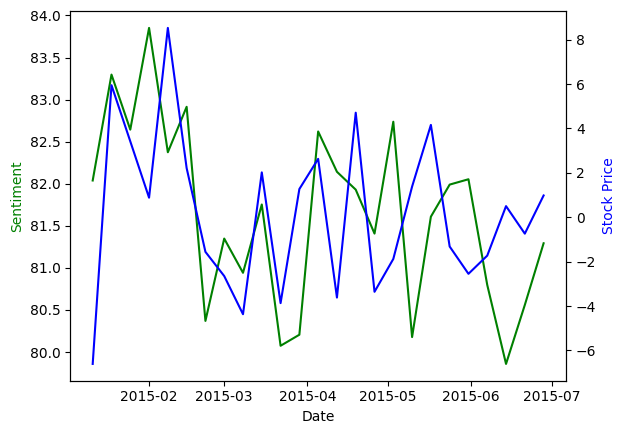

Correlation between sentiment (joy) and stock price: 0.32644540623668644


In [57]:
# apple anger sentiment plot
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(merge_apple['day_date'], merge_apple['anger'], 'g-')
ax2.plot(merge_apple['day_date'], merge_apple['net_price'], 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment', color='g')
ax2.set_ylabel('Stock Price', color='b')

plt.show()

# calculate the correlation between sentiment and stock price
corr = merge_apple['anger'].corr(merge_apple['net_price'])
print('Correlation between sentiment (anger) and stock price:', corr)

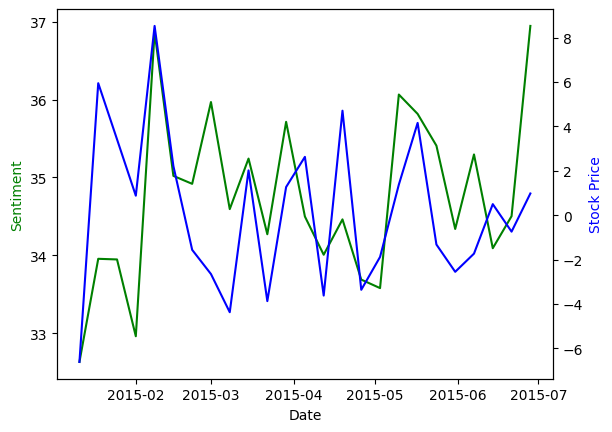

Correlation between sentiment (fear) and stock price: 0.1933333333333333
Correlation between sentiment (fear) and stock price: 0.41317417231031395


In [102]:
# apple fear sentiment plot
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(merge_apple['day_date'], merge_apple['fear'], 'g-')
ax2.plot(merge_apple['day_date'], merge_apple['net_price'], 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment', color='g')
ax2.set_ylabel('Stock Price', color='b')

plt.show()

# calculate the correlation between sentiment and stock price
corr = merge_apple['fear'].corr(merge_apple['net_price'])
print('Correlation between sentiment (fear) and stock price:', corr)

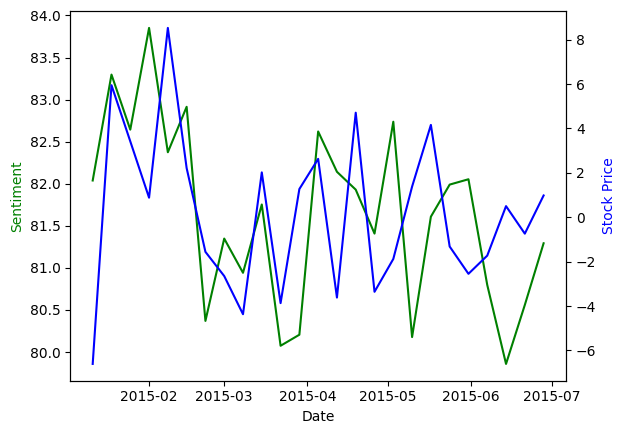

Correlation between sentiment (joy) and stock price: 0.32644540623668644


In [99]:
# apple joy sentiment plot
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(merge_apple['day_date'], merge_apple['joy'], 'g-')
ax2.plot(merge_apple['day_date'], merge_apple['net_price'], 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment', color='g')
ax2.set_ylabel('Stock Price', color='b')

plt.show()

# calculate the correlation between sentiment and stock price
corr = merge_apple['joy'].corr(merge_apple['net_price'])
print('Correlation between sentiment (joy) and stock price:', corr)

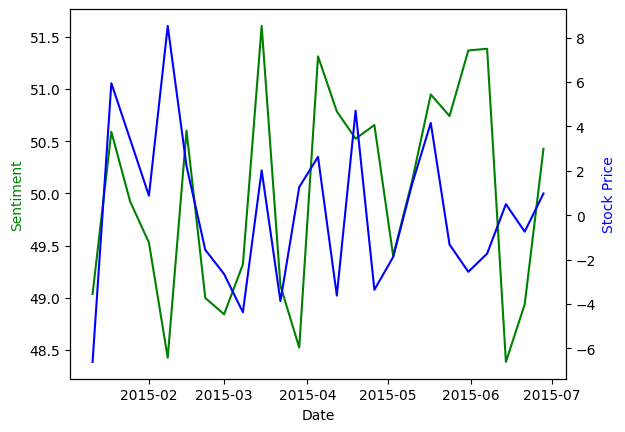

Correlation between sentiment (love) and stock price: 0.10478846051466364


In [58]:
# apple love sentiment plot
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(merge_apple['day_date'], merge_apple['love'], 'g-')
ax2.plot(merge_apple['day_date'], merge_apple['net_price'], 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment', color='g')
ax2.set_ylabel('Stock Price', color='b')

plt.show()

# calculate the correlation between sentiment and stock price
corr = merge_apple['love'].corr(merge_apple['net_price'])
print('Correlation between sentiment (love) and stock price:', corr)

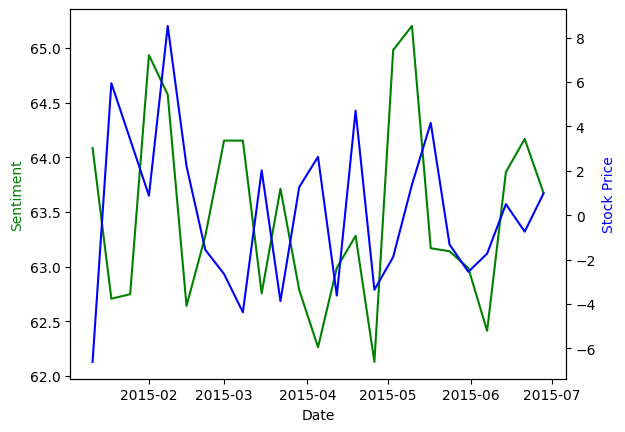

Correlation between sentiment (sadness) and stock price: -0.08078193709083811


In [59]:
# apple sadness sentiment plot
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(merge_apple['day_date'], merge_apple['sadness'], 'g-')
ax2.plot(merge_apple['day_date'], merge_apple['net_price'], 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment', color='g')
ax2.set_ylabel('Stock Price', color='b')

plt.show()

# calculate the correlation between sentiment and stock price
corr = merge_apple['sadness'].corr(merge_apple['net_price'])
print('Correlation between sentiment (sadness) and stock price:', corr)

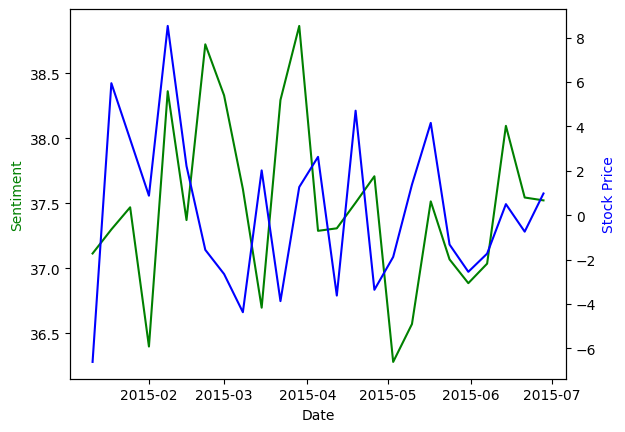

Correlation between sentiment (surprise) and stock price: 0.06295245789240617


In [60]:
# apple surprise sentiment plot
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(merge_apple['day_date'], merge_apple['surprise'], 'g-')
ax2.plot(merge_apple['day_date'], merge_apple['net_price'], 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment', color='g')
ax2.set_ylabel('Stock Price', color='b')

plt.show()

# calculate the correlation between sentiment and stock price
corr = merge_apple['surprise'].corr(merge_apple['net_price'])
print('Correlation between sentiment (surprise) and stock price:', corr)

In [61]:
#average sentiment for amazon
# result = np.mean(amazon, axis=0)
# for key,value in zip(encoded_dict.keys(), result):
#     print(key,value)
amzn_sentiment_mean = []
result_ans = []

for i in amzn:
    amzn_sentiment_mean.append((np.mean(i, axis=0)))
for i in amzn_sentiment_mean:
    result_dict = {}
    for key, value in zip(encoded_dict.keys(), i):
        result_dict[key]=value
    result_ans.append(result_dict)

df_amzn = pd.DataFrame(result_ans)
merge_amzn = pd.concat([price_amzn_test[['day_date', 'net_price']], df_amzn], axis=1)
merge_amzn

,day_date,net_price,anger,fear,joy,love,sadness,surprise
0,2015-01-11,-6.82,51.668861,33.917885,76.973190,43.807228,66.111526,38.862579
1,2015-01-18,26.11,43.840168,32.813873,80.615005,49.003365,62.720036,37.358967
2,2015-01-25,42.71,48.731213,33.142109,82.742271,49.232178,64.287582,36.461658
3,2015-02-01,24.23,45.619907,32.536781,82.578712,49.405964,63.100330,36.241165
4,2015-02-08,10.83,48.745071,34.987560,83.573082,52.019688,64.230705,35.515755
5,2015-02-15,5.25,49.085510,36.684906,81.508324,49.151890,62.206352,37.848976
6,2015-02-22,-3.28,48.954708,34.768173,81.267319,49.128704,62.860851,37.610470
7,2015-03-01,-0.76,48.718166,35.523991,82.209732,51.784428,62.128479,35.824429
8,2015-03-08,-7.82,47.620071,35.657421,81.548523,51.801224,62.099655,36.511139
9,2015-03-15,8.11,51.566833,38.824280,81.754173,49.980839,63.437229,38.117947


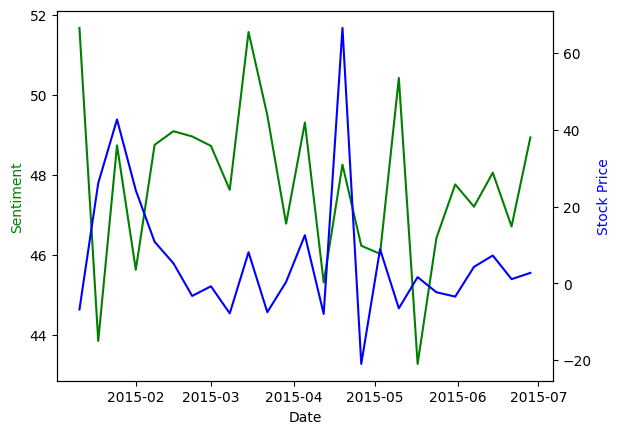

Correlation between sentiment (anger) and stock price: -0.033333333333333326
Correlation between sentiment (anger) and stock price: -0.04745392810855067


In [92]:
# amzn anger sentiment plot
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(merge_amzn['day_date'], merge_amzn['anger'], 'g-')
ax2.plot(merge_amzn['day_date'], merge_amzn['net_price'], 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment', color='g')
ax2.set_ylabel('Stock Price', color='b')

plt.show()

# calculate the correlation between sentiment and stock price
corr1 = merge_amzn['anger'].corr(merge_amzn['net_price'])
corr = merge_amzn['anger'].corr(merge_amzn['net_price'], method='kendall')
print('Correlation between sentiment (anger) and stock price:', corr)
print('Correlation between sentiment (anger) and stock price:', corr1)

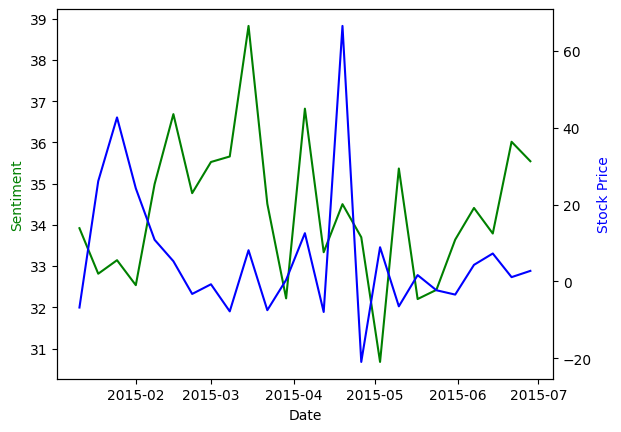

Correlation between sentiment (fear) and stock price: -0.0760791997312907


In [63]:
# amzn fear sentiment plot
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(merge_amzn['day_date'], merge_amzn['fear'], 'g-')
ax2.plot(merge_amzn['day_date'], merge_amzn['net_price'], 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment', color='g')
ax2.set_ylabel('Stock Price', color='b')

plt.show()

# calculate the correlation between sentiment and stock price
corr = merge_amzn['fear'].corr(merge_amzn['net_price'])
print('Correlation between sentiment (fear) and stock price:', corr)

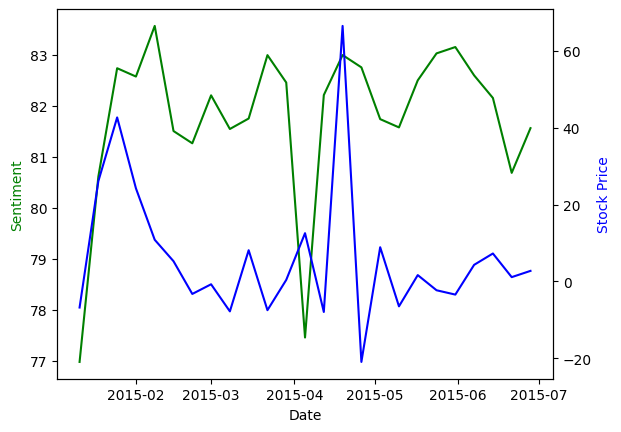

Correlation between sentiment (joy) and stock price: 0.11103277018411109


In [64]:
# amzn joy sentiment plot
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(merge_amzn['day_date'], merge_amzn['joy'], 'g-')
ax2.plot(merge_amzn['day_date'], merge_amzn['net_price'], 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment', color='g')
ax2.set_ylabel('Stock Price', color='b')

plt.show()

# calculate the correlation between sentiment and stock price
corr = merge_amzn['joy'].corr(merge_amzn['net_price'])
print('Correlation between sentiment (joy) and stock price:', corr)

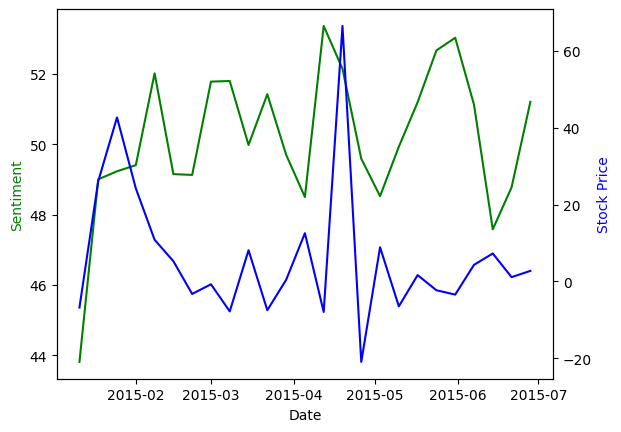

Correlation between sentiment (love) and stock price: 0.005902034539875169


In [65]:
# amzn love sentiment plot
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(merge_amzn['day_date'], merge_amzn['love'], 'g-')
ax2.plot(merge_amzn['day_date'], merge_amzn['net_price'], 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment', color='g')
ax2.set_ylabel('Stock Price', color='b')

plt.show()

# calculate the correlation between sentiment and stock price
corr = merge_amzn['love'].corr(merge_amzn['net_price'])
print('Correlation between sentiment (love) and stock price:', corr)

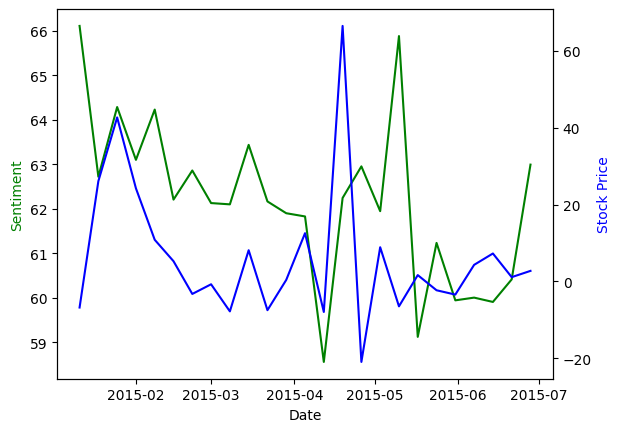

Correlation between sentiment (sadness) and stock price: 0.120382190612392


In [66]:
# amzn sadness sentiment plot
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(merge_amzn['day_date'], merge_amzn['sadness'], 'g-')
ax2.plot(merge_amzn['day_date'], merge_amzn['net_price'], 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment', color='g')
ax2.set_ylabel('Stock Price', color='b')

plt.show()

# calculate the correlation between sentiment and stock price
corr = merge_amzn['sadness'].corr(merge_amzn['net_price'])
print('Correlation between sentiment (sadness) and stock price:', corr)

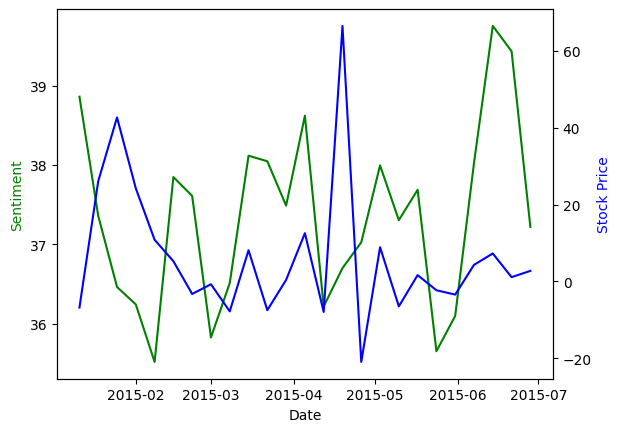

Correlation between sentiment (surprise) and stock price: -0.11689713344528851


In [67]:
# amzn surprise sentiment plot
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(merge_amzn['day_date'], merge_amzn['surprise'], 'g-')
ax2.plot(merge_amzn['day_date'], merge_amzn['net_price'], 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment', color='g')
ax2.set_ylabel('Stock Price', color='b')

plt.show()

# calculate the correlation between sentiment and stock price
corr = merge_amzn['surprise'].corr(merge_amzn['net_price'])
print('Correlation between sentiment (surprise) and stock price:', corr)

In [68]:
#average sentiment for google
# result = np.mean(google, axis=0)
# for key,value in zip(encoded_dict.keys(), result):
#     print(key,value)
google_sentiment_mean = []
result_ans = []

for i in google:
    google_sentiment_mean.append((np.mean(i, axis=0)))
for i in google_sentiment_mean:
    result_dict = {}
    for key, value in zip(encoded_dict.keys(), i):
        result_dict[key]=value
    result_ans.append(result_dict)

df_google = pd.DataFrame(result_ans)
merge_google = pd.concat([price_google_test[['day_date', 'net_price']], df_google], axis=1)
merge_google

,day_date,net_price,anger,fear,joy,love,sadness,surprise
0,2015-01-11,13.140,51.101063,37.058910,81.043175,49.057720,64.246361,38.203773
1,2015-01-18,39.940,43.221142,29.342710,81.549797,49.409687,58.223965,39.138435
2,2015-01-25,-4.010,46.449757,33.216106,83.646309,50.726650,62.242336,38.211655
3,2015-02-01,-0.730,46.306339,32.827358,81.797935,49.415321,63.630993,36.388382
4,2015-02-08,21.010,49.051682,33.676498,82.514511,50.187534,62.760281,37.864727
5,2015-02-15,-4.400,47.997967,34.578754,82.478539,51.843357,61.629086,36.707623
6,2015-02-22,22.350,50.592712,34.095936,80.617119,49.709545,60.326488,38.796177
7,2015-03-01,7.155,48.792286,33.103867,81.329948,49.573116,61.993202,37.909851
8,2015-03-08,-19.540,46.300171,31.834751,79.691307,49.148720,62.768204,37.562099
9,2015-03-15,9.410,42.009121,31.732061,80.853256,49.837482,57.810570,39.031273


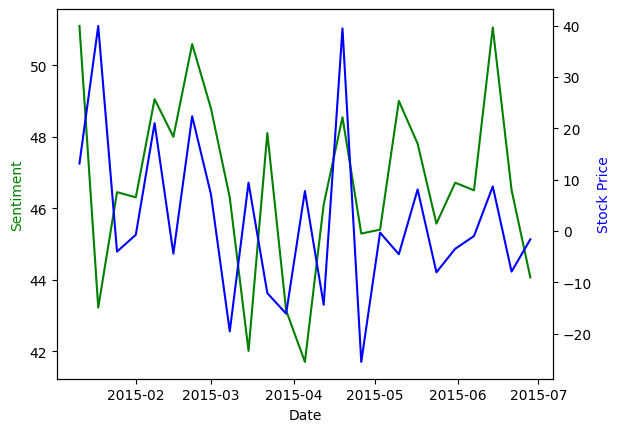

Correlation between sentiment (anger) and stock price: 0.19806335527998842


In [69]:
# google anger sentiment plot
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(merge_google['day_date'], merge_google['anger'], 'g-')
ax2.plot(merge_google['day_date'], merge_google['net_price'], 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment', color='g')
ax2.set_ylabel('Stock Price', color='b')

plt.show()

# calculate the correlation between sentiment and stock price
corr = merge_google['anger'].corr(merge_google['net_price'])
print('Correlation between sentiment (anger) and stock price:', corr)

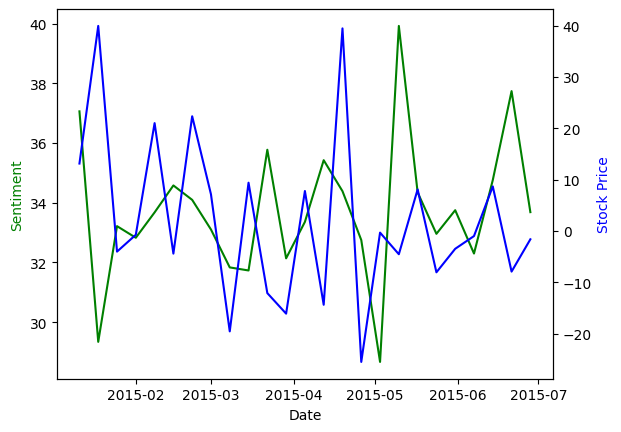

Correlation between sentiment (fear) and stock price: -0.13395210183327377


In [70]:
# google fear sentiment plot
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(merge_google['day_date'], merge_google['fear'], 'g-')
ax2.plot(merge_google['day_date'], merge_google['net_price'], 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment', color='g')
ax2.set_ylabel('Stock Price', color='b')

plt.show()

# calculate the correlation between sentiment and stock price
corr = merge_google['fear'].corr(merge_google['net_price'])
print('Correlation between sentiment (fear) and stock price:', corr)

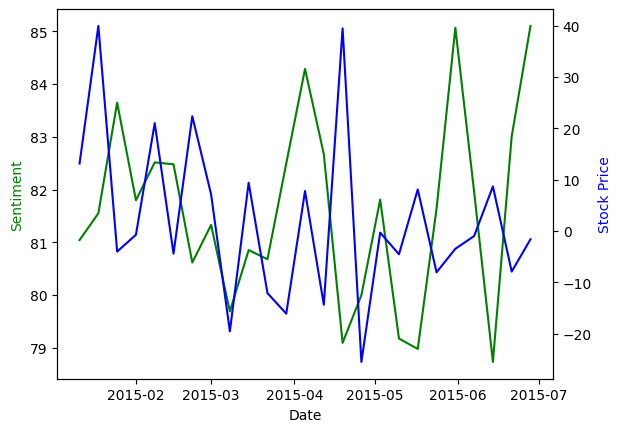

Correlation between sentiment (joy) and stock price: -0.1665196429080957


In [71]:
# google joy sentiment plot
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(merge_google['day_date'], merge_google['joy'], 'g-')
ax2.plot(merge_google['day_date'], merge_google['net_price'], 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment', color='g')
ax2.set_ylabel('Stock Price', color='b')

plt.show()

# calculate the correlation between sentiment and stock price
corr = merge_google['joy'].corr(merge_google['net_price'])
print('Correlation between sentiment (joy) and stock price:', corr)

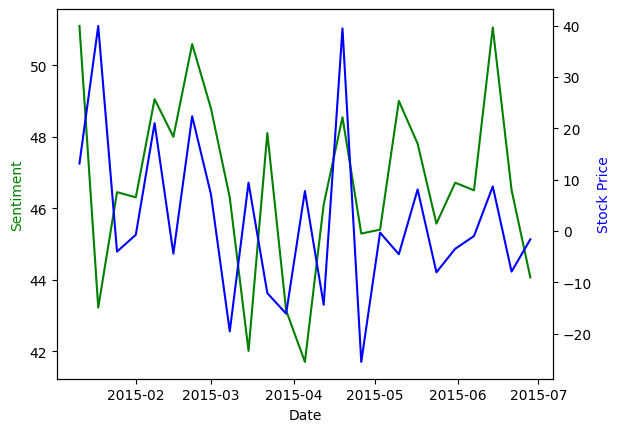

Correlation between sentiment (anger) and stock price: 0.19806335527998842


In [72]:
# google love sentiment plot
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(merge_google['day_date'], merge_google['anger'], 'g-')
ax2.plot(merge_google['day_date'], merge_google['net_price'], 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment', color='g')
ax2.set_ylabel('Stock Price', color='b')

plt.show()

# calculate the correlation between sentiment and stock price
corr = merge_google['anger'].corr(merge_google['net_price'])
print('Correlation between sentiment (anger) and stock price:', corr)

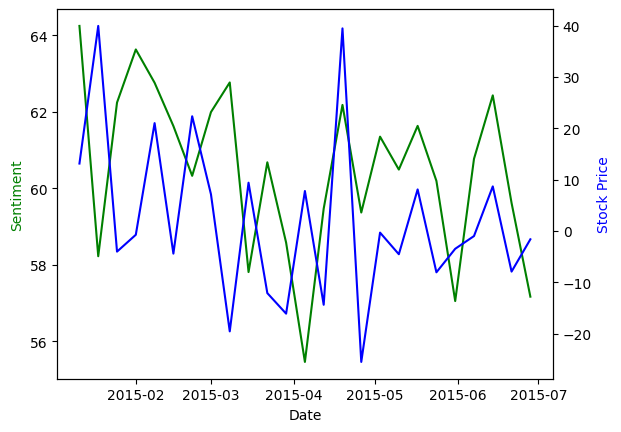

Correlation between sentiment (sadness) and stock price: 0.0944962621683511


In [73]:
# google sadness sentiment plot
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(merge_google['day_date'], merge_google['sadness'], 'g-')
ax2.plot(merge_google['day_date'], merge_google['net_price'], 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment', color='g')
ax2.set_ylabel('Stock Price', color='b')

plt.show()

# calculate the correlation between sentiment and stock price
corr = merge_google['sadness'].corr(merge_google['net_price'])
print('Correlation between sentiment (sadness) and stock price:', corr)

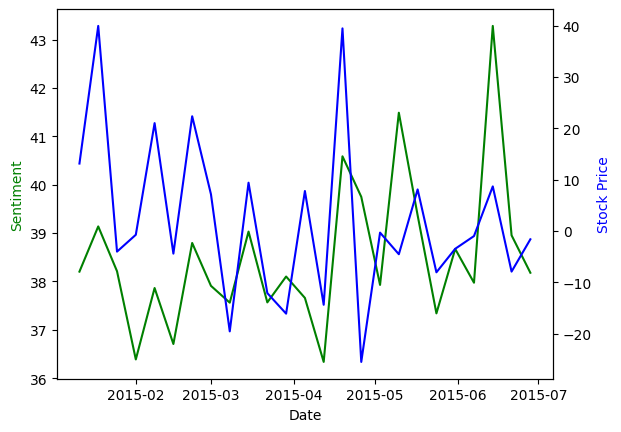

Correlation between sentiment (surprise) and stock price: 0.2944670094353707


In [74]:
# google surprise sentiment plot
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(merge_google['day_date'], merge_google['surprise'], 'g-')
ax2.plot(merge_google['day_date'], merge_google['net_price'], 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment', color='g')
ax2.set_ylabel('Stock Price', color='b')

plt.show()

# calculate the correlation between sentiment and stock price
corr = merge_google['surprise'].corr(merge_google['net_price'])
print('Correlation between sentiment (surprise) and stock price:', corr)

In [75]:
#average sentiment for msft
# result = np.mean(msft, axis=0)
# for key,value in zip(encoded_dict.keys(), result):
#     print(key,value)
msft_sentiment_mean = []
result_ans = []

for i in msft:
    msft_sentiment_mean.append((np.mean(i, axis=0)))
for i in msft_sentiment_mean:
    result_dict = {}
    for key, value in zip(encoded_dict.keys(), i):
        result_dict[key]=value
    result_ans.append(result_dict)

df_msft = pd.DataFrame(result_ans)
merge_msft = pd.concat([price_msft_test[['day_date', 'net_price']], df_msft], axis=1)
merge_msft

,day_date,net_price,anger,fear,joy,love,sadness,surprise
0,2015-01-11,-1.180,43.928829,30.919287,81.954491,50.822933,61.007202,38.374535
1,2015-01-18,1.870,43.494659,32.770054,83.413597,50.418121,56.037910,39.263737
2,2015-01-25,-6.600,46.859673,36.151497,80.657051,47.173744,62.747868,39.569077
3,2015-02-01,1.820,45.451145,32.405338,81.946846,45.060646,64.678658,38.478527
4,2015-02-08,1.630,43.220104,32.324657,82.785233,50.784985,61.940712,36.104694
5,2015-02-15,0.475,44.678905,29.208679,82.476402,49.168259,65.351517,35.631416
6,2015-02-22,0.150,49.015774,37.383099,83.336555,50.956127,61.607639,37.443424
7,2015-03-01,-1.310,47.298229,33.625668,79.866966,50.331207,67.354897,35.508881
8,2015-03-08,-0.810,47.280506,33.971436,81.341484,46.618134,64.087090,39.090519
9,2015-03-15,1.410,49.581779,34.184231,82.075500,45.855518,64.668961,39.420864


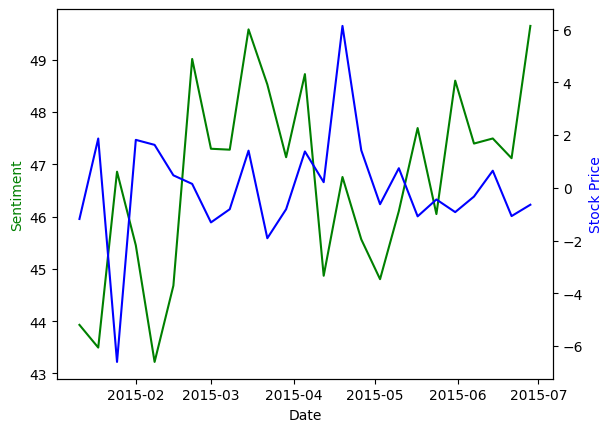

Correlation between sentiment (anger) and stock price: -0.16979444931240617


In [76]:
# msft anger sentiment plot
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(merge_msft['day_date'], merge_msft['anger'], 'g-')
ax2.plot(merge_msft['day_date'], merge_msft['net_price'], 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment', color='g')
ax2.set_ylabel('Stock Price', color='b')

plt.show()

# calculate the correlation between sentiment and stock price
corr = merge_msft['anger'].corr(merge_msft['net_price'])
print('Correlation between sentiment (anger) and stock price:', corr)

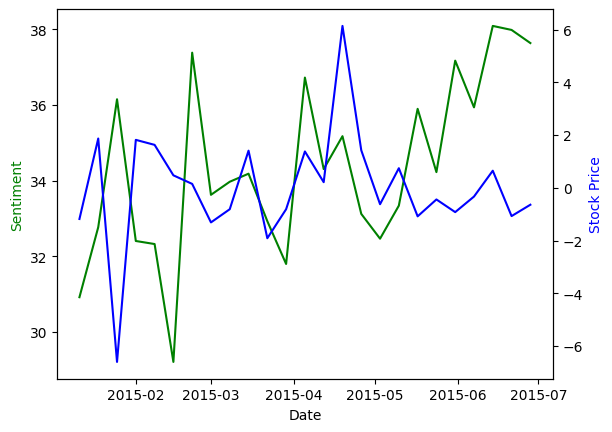

Correlation between sentiment (fear) and stock price: -0.12467886477279189


In [77]:
# msft fear sentiment plot
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(merge_msft['day_date'], merge_msft['fear'], 'g-')
ax2.plot(merge_msft['day_date'], merge_msft['net_price'], 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment', color='g')
ax2.set_ylabel('Stock Price', color='b')

plt.show()

# calculate the correlation between sentiment and stock price
corr = merge_msft['fear'].corr(merge_msft['net_price'])
print('Correlation between sentiment (fear) and stock price:', corr)

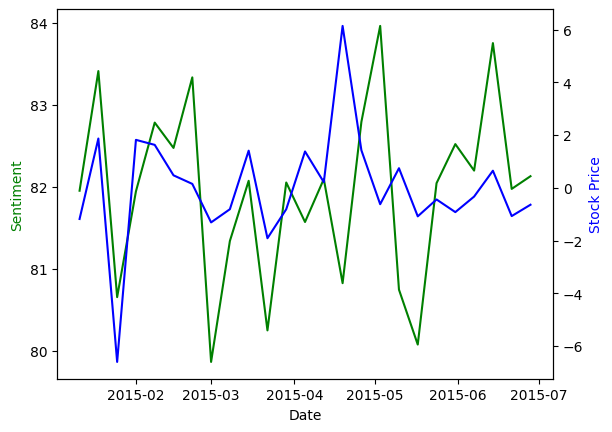

Correlation between sentiment (joy) and stock price: 0.24180853223666351


In [78]:
# msft joy sentiment plot
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(merge_msft['day_date'], merge_msft['joy'], 'g-')
ax2.plot(merge_msft['day_date'], merge_msft['net_price'], 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment', color='g')
ax2.set_ylabel('Stock Price', color='b')

plt.show()

# calculate the correlation between sentiment and stock price
corr = merge_msft['joy'].corr(merge_msft['net_price'])
print('Correlation between sentiment (joy) and stock price:', corr)

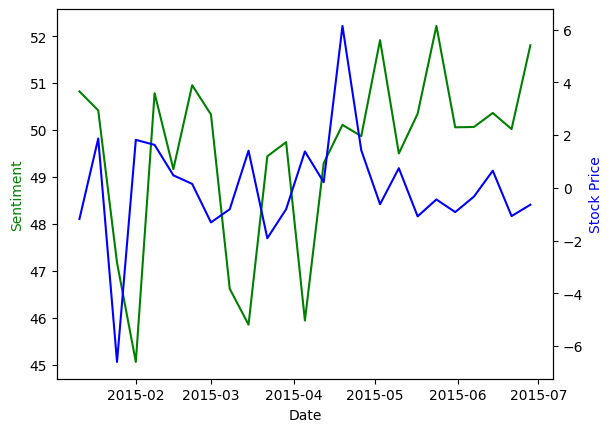

Correlation between sentiment (love) and stock price: -0.008677514802096635


In [79]:
# msft love sentiment plot
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(merge_msft['day_date'], merge_msft['love'], 'g-')
ax2.plot(merge_msft['day_date'], merge_msft['net_price'], 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment', color='g')
ax2.set_ylabel('Stock Price', color='b')

plt.show()

# calculate the correlation between sentiment and stock price
corr = merge_msft['love'].corr(merge_msft['net_price'])
print('Correlation between sentiment (love) and stock price:', corr)

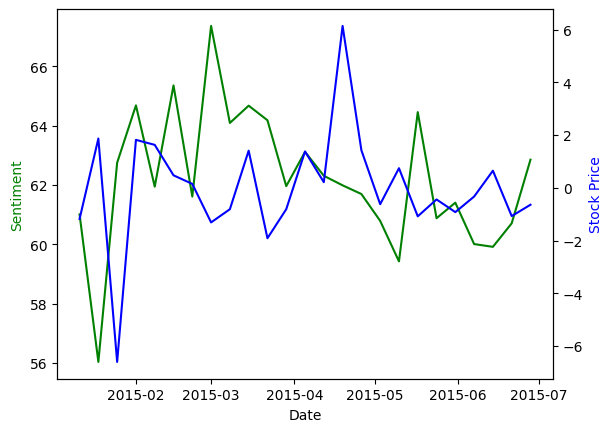

Correlation between sentiment (sadness) and stock price: -0.16253850961837774


In [80]:
# msft sadness sentiment plot
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(merge_msft['day_date'], merge_msft['sadness'], 'g-')
ax2.plot(merge_msft['day_date'], merge_msft['net_price'], 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment', color='g')
ax2.set_ylabel('Stock Price', color='b')

plt.show()

# calculate the correlation between sentiment and stock price
corr = merge_msft['sadness'].corr(merge_msft['net_price'])
print('Correlation between sentiment (sadness) and stock price:', corr)

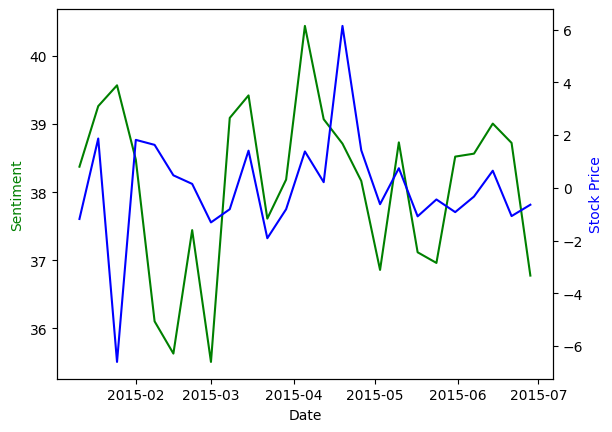

Correlation between sentiment (surprise) and stock price: 0.0609735955027744


In [81]:
# msft surprise sentiment plot
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(merge_msft['day_date'], merge_msft['surprise'], 'g-')
ax2.plot(merge_msft['day_date'], merge_msft['net_price'], 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment', color='g')
ax2.set_ylabel('Stock Price', color='b')

plt.show()

# calculate the correlation between sentiment and stock price
corr = merge_msft['surprise'].corr(merge_msft['net_price'])
print('Correlation between sentiment (surprise) and stock price:', corr)

In [82]:
#average sentiment for tesla
# result = np.mean(tesla, axis=0)
# for key,value in zip(encoded_dict.keys(), result):
#     print(key,value)
tsla_sentiment_mean = []
result_ans = []

for i in tsla:
    tsla_sentiment_mean.append((np.mean(i, axis=0)))
for i in tsla_sentiment_mean:
    result_dict = {}
    for key, value in zip(encoded_dict.keys(), i):
        result_dict[key]=value
    result_ans.append(result_dict)

df_tsla = pd.DataFrame(result_ans)
merge_tsla = pd.concat([price_tsla_test[['day_date', 'net_price']], df_tsla], axis=1)
merge_tsla

,day_date,net_price,anger,fear,joy,love,sadness,surprise
0,2015-01-11,-9.980,49.171116,35.133820,78.841606,45.605057,63.300949,40.122578
1,2015-01-18,10.590,50.131817,36.984821,80.151405,45.271133,66.101372,39.726761
2,2015-01-25,1.770,52.224804,37.532032,81.866676,48.848099,62.464684,40.524754
3,2015-02-01,13.390,49.532524,33.983795,82.330437,49.841038,61.493298,39.012962
4,2015-02-08,-11.610,47.520599,34.254116,80.171593,48.972630,64.226311,37.134312
5,2015-02-15,14.210,50.199020,37.707710,79.660454,45.762878,64.375900,40.133270
6,2015-02-22,-12.320,49.373352,35.691227,78.799278,46.754555,62.505661,40.602444
7,2015-03-01,-8.820,50.097092,38.361008,78.943489,45.873234,63.117203,40.552773
8,2015-03-08,-5.710,50.120392,34.771175,80.769363,47.668163,64.066032,38.765778
9,2015-03-15,6.080,50.412704,38.040554,78.023499,47.696457,64.299286,39.913361


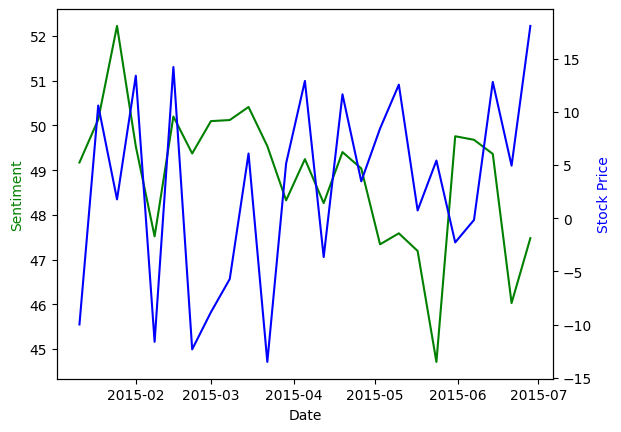

Correlation between sentiment (anger) and stock price: -0.11400764450113111


In [83]:
# tsla anger sentiment plot
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(merge_tsla['day_date'], merge_tsla['anger'], 'g-')
ax2.plot(merge_tsla['day_date'], merge_tsla['net_price'], 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment', color='g')
ax2.set_ylabel('Stock Price', color='b')

plt.show()

# calculate the correlation between sentiment and stock price
corr = merge_tsla['anger'].corr(merge_tsla['net_price'])
print('Correlation between sentiment (anger) and stock price:', corr)

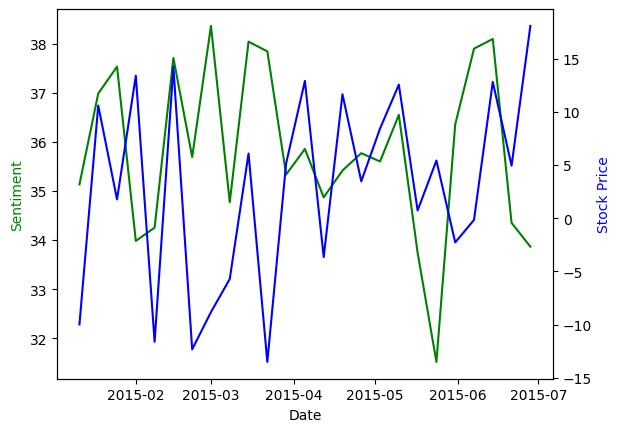

Correlation between sentiment (fear) and stock price: -0.05656032989924236


In [84]:
# tsla fear sentiment plot
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(merge_tsla['day_date'], merge_tsla['fear'], 'g-')
ax2.plot(merge_tsla['day_date'], merge_tsla['net_price'], 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment', color='g')
ax2.set_ylabel('Stock Price', color='b')

plt.show()

# calculate the correlation between sentiment and stock price
corr = merge_tsla['fear'].corr(merge_tsla['net_price'])
print('Correlation between sentiment (fear) and stock price:', corr)

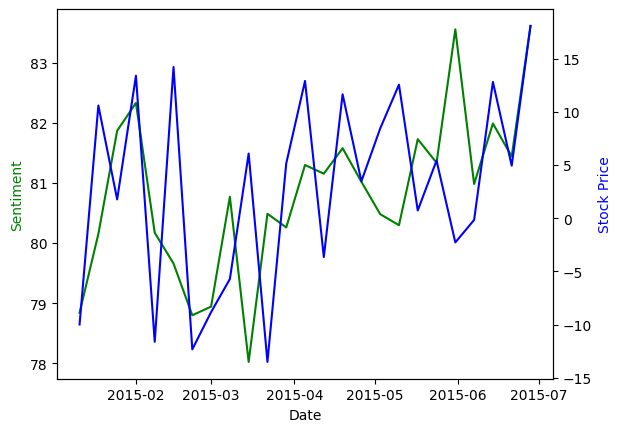

Correlation between sentiment (joy) and stock price: 0.39550035021720564


In [85]:
# tsla joy sentiment plot
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(merge_tsla['day_date'], merge_tsla['joy'], 'g-')
ax2.plot(merge_tsla['day_date'], merge_tsla['net_price'], 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment', color='g')
ax2.set_ylabel('Stock Price', color='b')

plt.show()

# calculate the correlation between sentiment and stock price
corr = merge_tsla['joy'].corr(merge_tsla['net_price'])
print('Correlation between sentiment (joy) and stock price:', corr)

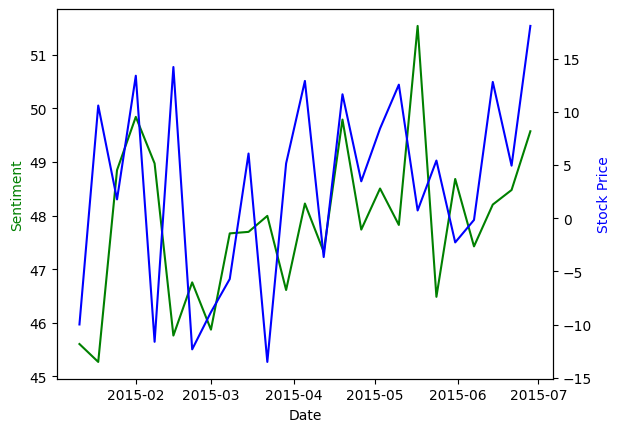

Correlation between sentiment (love) and stock price: 0.20373874743097947


In [86]:
# tsla love sentiment plot
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(merge_tsla['day_date'], merge_tsla['love'], 'g-')
ax2.plot(merge_tsla['day_date'], merge_tsla['net_price'], 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment', color='g')
ax2.set_ylabel('Stock Price', color='b')

plt.show()

# calculate the correlation between sentiment and stock price
corr = merge_tsla['love'].corr(merge_tsla['net_price'])
print('Correlation between sentiment (love) and stock price:', corr)

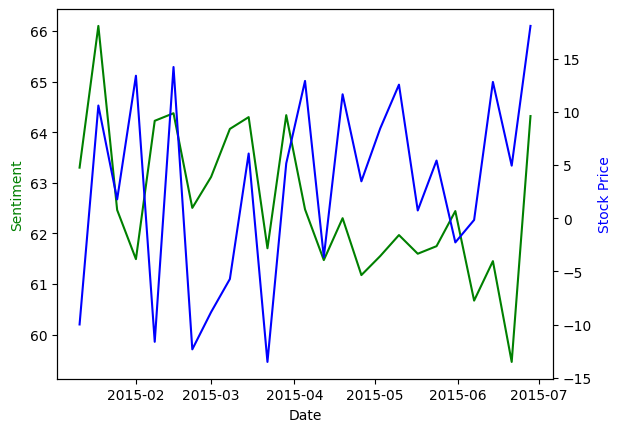

Correlation between sentiment (sadness) and stock price: 0.04614735845480011


In [87]:
# tsla sadness sentiment plot
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(merge_tsla['day_date'], merge_tsla['sadness'], 'g-')
ax2.plot(merge_tsla['day_date'], merge_tsla['net_price'], 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment', color='g')
ax2.set_ylabel('Stock Price', color='b')

plt.show()

# calculate the correlation between sentiment and stock price
corr = merge_tsla['sadness'].corr(merge_tsla['net_price'])
print('Correlation between sentiment (sadness) and stock price:', corr)

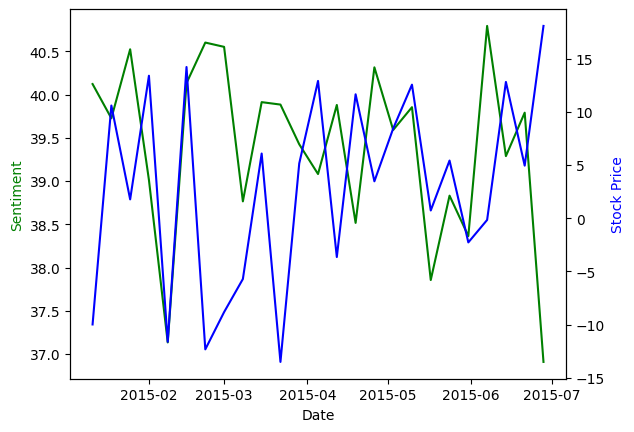

Correlation between sentiment (surprise) and stock price: -0.20005124034552862


In [88]:
# tsla surprise sentiment plot
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(merge_tsla['day_date'], merge_tsla['surprise'], 'g-')
ax2.plot(merge_tsla['day_date'], merge_tsla['net_price'], 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment', color='g')
ax2.set_ylabel('Stock Price', color='b')

plt.show()

# calculate the correlation between sentiment and stock price
corr = merge_tsla['surprise'].corr(merge_tsla['net_price'])
print('Correlation between sentiment (surprise) and stock price:', corr)